In [38]:
import pandas as pd;
import numpy as np;
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split


In [39]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA PREPROCESSING

In [40]:
df=df.drop(['Name','PassengerId','Ticket','Cabin'],axis='columns')
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
from sklearn.preprocessing import LabelEncoder

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) 
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

C:\Users\Chirag\AppData\Local\Temp\ipykernel_10448\2813865638.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

Checking the best way to fill the null values in age column

In [42]:
df_mean=df.copy()
df_median=df.copy()
df_knn=df.copy()

In [43]:
df_mean['Age'].fillna(df_mean['Age'].mean(),inplace=True)
df_median['Age'].fillna(df_mean['Age'].median(),inplace=True)
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[['Age']] = knn_imputer.fit_transform(df_knn[['Age']])


C:\Users\Chirag\AppData\Local\Temp\ipykernel_10448\2781265013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Age'].fillna(df_mean['Age'].mean(),inplace=True)
C:\Users\Chirag\AppData\Local\Temp\ipykernel_10448\2781265013.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
X_mean = df_mean.drop('Survived', axis=1)
y = df_mean['Survived']

X_median = df_median.drop('Survived', axis=1)
X_knn = df_knn.drop('Survived', axis=1)

model = LogisticRegression(max_iter=1000)

print("Mean Imputation Score:", cross_val_score(model, X_mean, y, cv=5).mean())
print("Median Imputation Score:", cross_val_score(model, X_median, y, cv=5).mean())
print("KNN Imputation Score:", cross_val_score(model, X_knn, y, cv=5).mean())


Mean Imputation Score: 0.786761659657272
Median Imputation Score: 0.786761659657272
KNN Imputation Score: 0.786761659657272


In [45]:
#Cross-validation results showed identical accuracy across mean, median, and KNN-based imputations. Due to its robustness and simplicity, median imputation is selected for final preprocessing.

In [46]:
df['Age'].fillna(df['Age'].median(), inplace=True)


C:\Users\Chirag\AppData\Local\Temp\ipykernel_10448\286566303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [47]:
X=df.drop(['Survived'],axis='columns')
y=df['Survived']

Checking the best model

In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [49]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=0),
    "LightGBM": LGBMClassifier()
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring="accuracy")
    print(f"{name}: {scores.mean():.4f}")

Random Forest: 0.8204
Gradient Boosting: 0.8328
AdaBoost: 0.8115
KNN: 0.7093
XGBoost: 0.8204


In [ ]:
#We see that lightGBM performs the best.

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.753731343283582

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.79       157
           1       0.71      0.69      0.70       111

    accuracy                           0.75       268
   macro avg       0.75      0.74      0.75       268
weighted avg       0.75      0.75      0.75       268


Confusion Matrix:
 [[125  32]
 [ 34  77]]


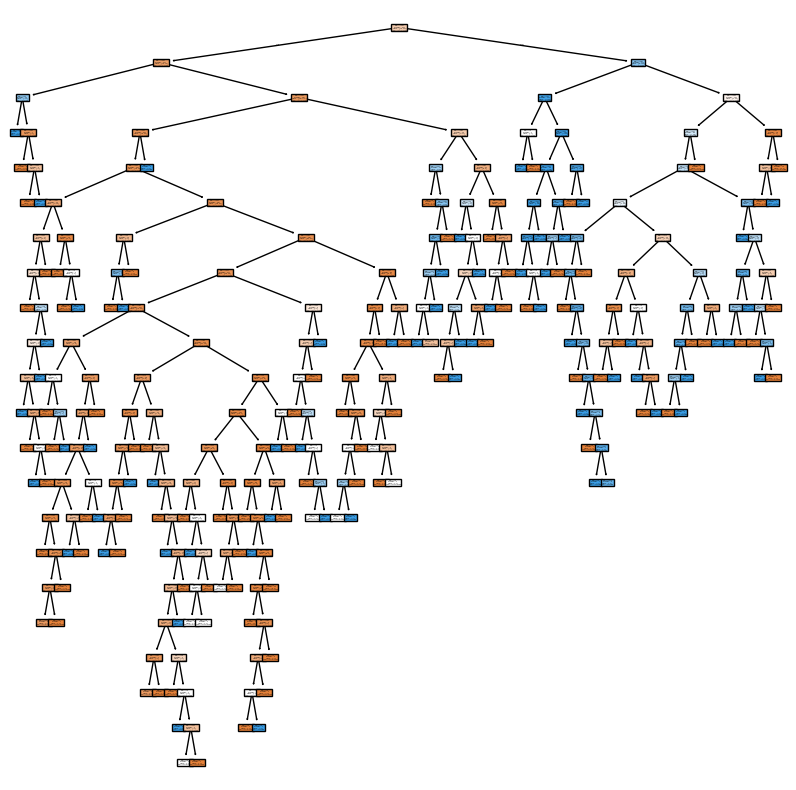

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":[5,10,15], 
    "min_samples_split":[2, 5], 
    "min_samples_leaf":[1,5], 
}

grid_search = GridSearchCV(estimator=dt, param_grid=params, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ('gini', ...), 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 5], 'min_samples_split': [2, 5], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'random'}
Best Cross-Validation Score: 0.8346580645161289


In [ ]:
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7686567164179104

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.85      0.81       157
           1       0.75      0.66      0.70       111

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.77       268



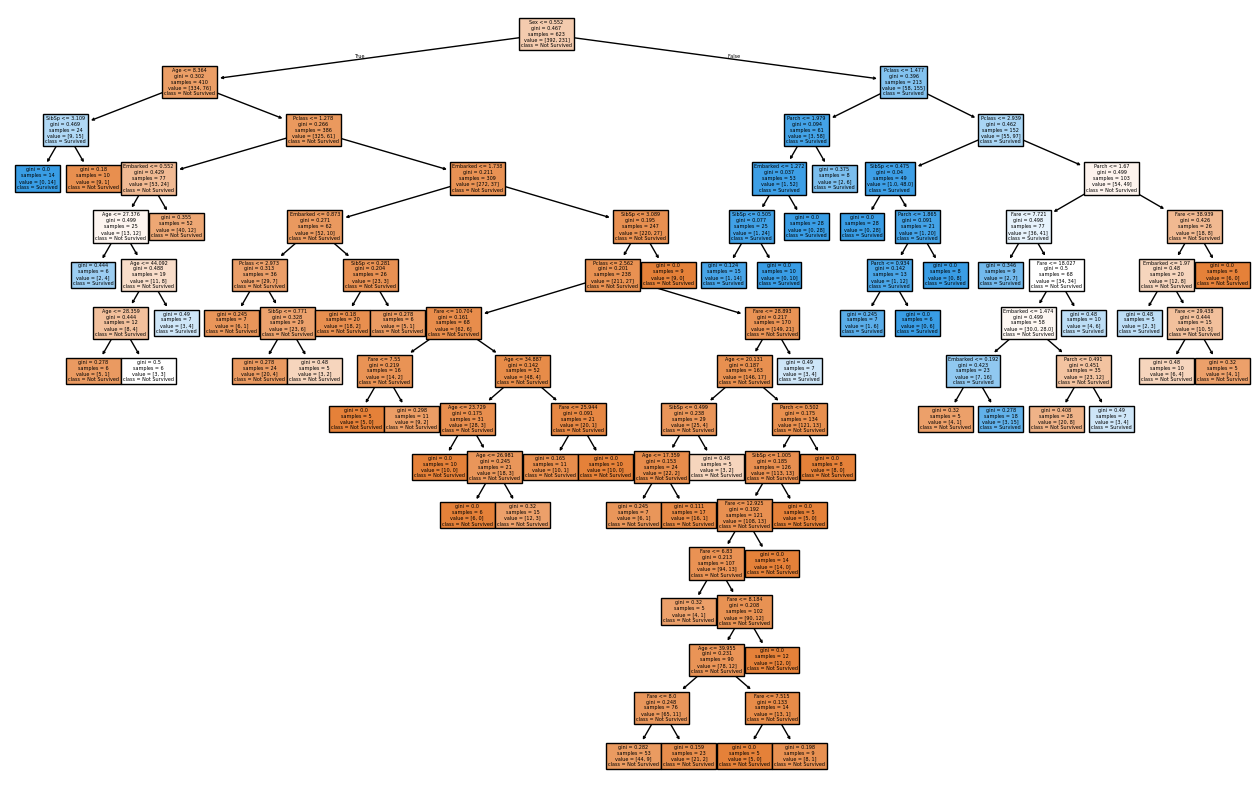

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()
